In [225]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [226]:
df_train=pd.read_csv("train.csv")
df_train.shape
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [227]:
df_test=pd.read_csv("test.csv")
df_test.shape

(1459, 80)

In [228]:
df_train.drop('Id',axis=1,inplace=True)
df_test.drop('Id',axis=1,inplace=True)

In [229]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [230]:
a=[]
a=df_train.columns

In [231]:
for i in a:
    if df_train[i].dtype!=object:
        kurtious=round(df_train[i].kurt(),2)
        skew=round(df_train[i].skew(),2)
        print(f"{i}  {kurtious}  {skew}")

MSSubClass  1.58  1.41
LotFrontage  17.45  2.16
LotArea  203.24  12.21
OverallQual  0.1  0.22
OverallCond  1.11  0.69
YearBuilt  -0.44  -0.61
YearRemodAdd  -1.27  -0.5
MasVnrArea  10.08  2.67
BsmtFinSF1  11.12  1.69
BsmtFinSF2  20.11  4.26
BsmtUnfSF  0.47  0.92
TotalBsmtSF  13.25  1.52
1stFlrSF  5.75  1.38
2ndFlrSF  -0.55  0.81
LowQualFinSF  83.23  9.01
GrLivArea  4.9  1.37
BsmtFullBath  -0.84  0.6
BsmtHalfBath  16.4  4.1
FullBath  -0.86  0.04
HalfBath  -1.08  0.68
BedroomAbvGr  2.23  0.21
KitchenAbvGr  21.53  4.49
TotRmsAbvGrd  0.88  0.68
Fireplaces  -0.22  0.65
GarageYrBlt  -0.42  -0.65
GarageCars  0.22  -0.34
GarageArea  0.92  0.18
WoodDeckSF  2.99  1.54
OpenPorchSF  8.49  2.36
EnclosedPorch  10.43  3.09
3SsnPorch  123.66  10.3
ScreenPorch  18.44  4.12
PoolArea  223.27  14.83
MiscVal  701.0  24.48
MoSold  -0.4  0.21
YrSold  -1.19  0.1
SalePrice  6.54  1.88


In [232]:
#地面上面積極端值去除
s=df_train['GrLivArea'].sort_values(ascending = False)
s.head(10)

1298    5642
523     4676
1182    4476
691     4316
1169    3627
185     3608
304     3493
1268    3447
635     3395
769     3279
Name: GrLivArea, dtype: int64

In [233]:
df_train = df_train[df_train.GrLivArea < 4500]

(6.52, 1.88)

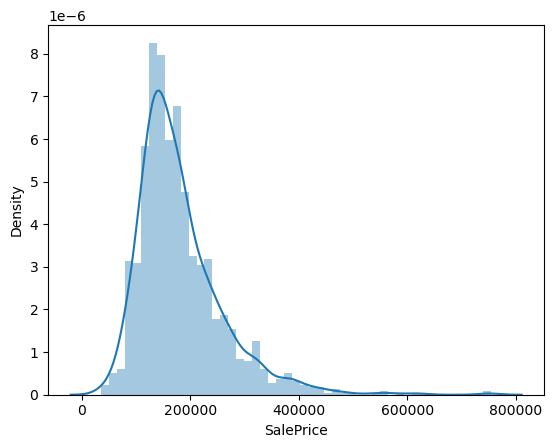

In [234]:
sns.distplot(df_train['SalePrice'],kde=True,hist=True)
kurtious=round(df_train['SalePrice'].kurt(),2)
skew=round(df_train['SalePrice'].skew(),2)
kurtious,skew

In [235]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

(0.8, 0.12)

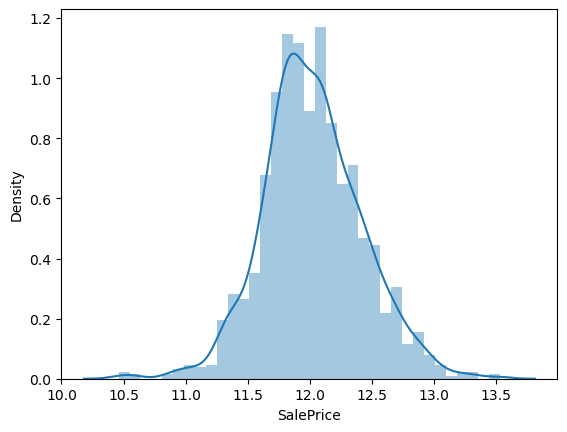

In [236]:
sns.distplot(df_train['SalePrice'],kde=True,hist=True)
kurtious=round(df_train['SalePrice'].kurt(),2)
skew=round(df_train['SalePrice'].skew(),2)
kurtious,skew

In [237]:
y = df_train['SalePrice'].reset_index(drop=True)
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1453    12.072547
1454    12.254868
1455    12.493133
1456    11.864469
1457    11.901590
Name: SalePrice, Length: 1458, dtype: float64

In [238]:
new_train = df_train.drop(['SalePrice'], axis=1)
new_test = test

In [239]:
feat=pd.concat([new_train,new_test]).reset_index(drop=True)
feat

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2913,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2914,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2915,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [240]:
a=feat.isnull().sum()
for value in a.items():
    if value[1]>0:
        print(value)

('MSZoning', 4)
('LotFrontage', 486)
('Alley', 2719)
('Utilities', 2)
('Exterior1st', 1)
('Exterior2nd', 1)
('MasVnrType', 24)
('MasVnrArea', 23)
('BsmtQual', 81)
('BsmtCond', 82)
('BsmtExposure', 82)
('BsmtFinType1', 79)
('BsmtFinSF1', 1)
('BsmtFinType2', 80)
('BsmtFinSF2', 1)
('BsmtUnfSF', 1)
('TotalBsmtSF', 1)
('Electrical', 1)
('BsmtFullBath', 2)
('BsmtHalfBath', 2)
('KitchenQual', 1)
('Functional', 2)
('FireplaceQu', 1420)
('GarageType', 157)
('GarageYrBlt', 159)
('GarageFinish', 159)
('GarageCars', 1)
('GarageArea', 1)
('GarageQual', 159)
('GarageCond', 159)
('PoolQC', 2908)
('Fence', 2346)
('MiscFeature', 2812)
('SaleType', 1)


In [241]:
feat['MSSubClass'] = feat['MSSubClass'].apply(str)
feat['YrSold'] = feat['YrSold'].astype(str)
feat['MoSold'] = feat['MoSold'].astype(str)

In [242]:
feat.Electrical.value_counts(),feat.PoolQC.value_counts(),feat.KitchenQual.value_counts(),feat.Functional.value_counts()

(SBrkr    2669
 FuseA     188
 FuseF      50
 FuseP       8
 Mix         1
 Name: Electrical, dtype: int64,
 Ex    4
 Gd    3
 Fa    2
 Name: PoolQC, dtype: int64,
 TA    1492
 Gd    1151
 Ex     203
 Fa      70
 Name: KitchenQual, dtype: int64,
 Typ     2715
 Min2      70
 Min1      65
 Mod       35
 Maj1      19
 Maj2       9
 Sev        2
 Name: Functional, dtype: int64)

In [243]:
feat['Functional'] = feat['Functional'].fillna('Typ') #空值填充为str型数据'Typ'
feat['Electrical'] = feat['Electrical'].fillna("SBrkr") #空值填充为str型数据"SBrkr"
feat['KitchenQual'] = feat['KitchenQual'].fillna("TA") #空值填充为str型数据"TA"
feat["PoolQC"] = feat["PoolQC"].fillna("None")

In [244]:
#補眾數
feat['Exterior1st'].mode()[0]
feat['Exterior1st'] = feat['Exterior1st'].fillna(feat['Exterior1st'].mode()[0])
feat['Exterior2nd'] = feat['Exterior2nd'].fillna(feat['Exterior2nd'].mode()[0])
feat['SaleType'] = feat['SaleType'].fillna(feat['SaleType'].mode()[0])

In [245]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    feat[col] = feat[col].fillna(0)

In [246]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    feat[col] = feat[col].fillna('None')